In [1]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('..')
import gym
import yowie_gym

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# AUV Navigation

In [3]:
env = gym.make('AUV-Navigation-v1')

## Passive Dynamics ($U$ = 0)

In [4]:
frames = []
x0 = env.reset()
S_zero = [x0]
g_zero = []
while True:
    u = np.zeros(env.action_space.shape[0])
    frames += [ env.render(mode="rgb_array") ]
    x, r, done, info = env.step(u)
    S_zero.append(x)
    g_zero.append(r)
    if done: break
S_zero = np.hstack(S_zero)
g_zero = np.asarray(g_zero, dtype=np.float64)
J_zero = np.asarray([ np.sum(g_zero[k:]) for k in range(g_zero.shape[0])], dtype=np.float64)

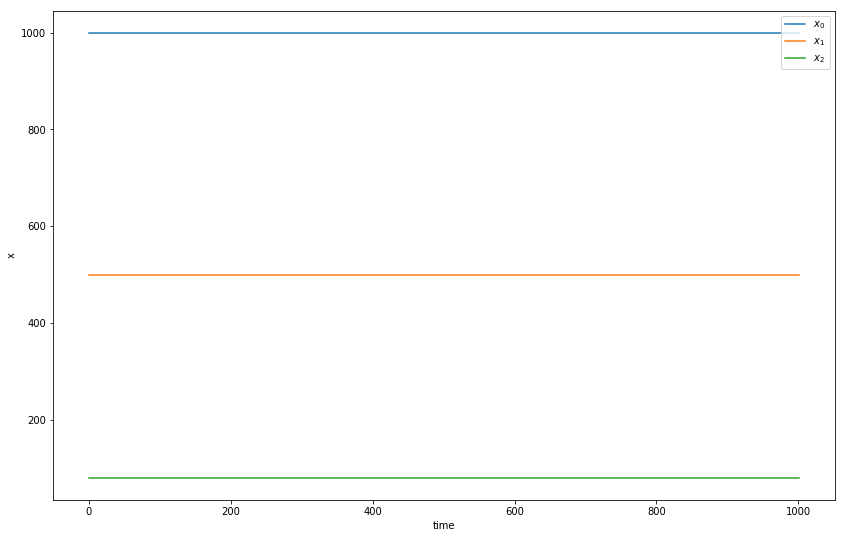

In [5]:
fig, ax = plt.subplots(1,1, figsize=(14,9))

ax.set_xlabel('time')
ax.set_ylabel('x')


for x_dim in range(S_zero.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_zero.shape[1], num=S_zero.shape[1])
    ys = S_zero[x_dim,:]
    ax.plot(xs, ys, label='$x_{}$'.format(x_dim))

ax.legend()